# Пример перебора гиперпараметров

Игрушечные данные (для примера)

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Производим перебор

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from collections import defaultdict


C_list = np.logspace(-2, 0, num=10)
solver_list = ['lbfgs', 'liblinear', 'newton-cg']
res = defaultdict(list)
for C in C_list:
    for solver in solver_list:
        model = LogisticRegression(C=C, solver=solver).fit(X_train, y_train)
        score = model.score(X_test, y_test)
        res['score'].append(score)
        res['C'].append(C)
        res['solver'].append(solver)

Визуализируем результат

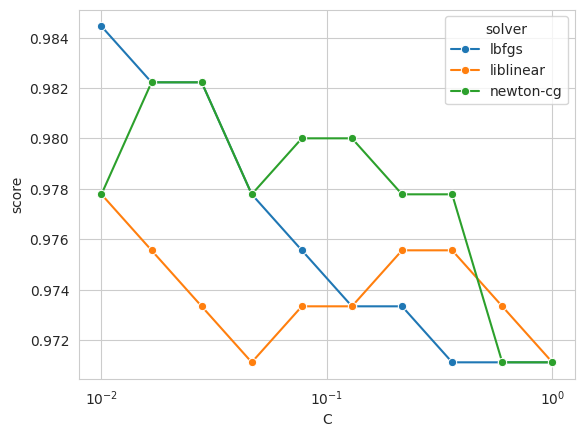

In [4]:
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

df = pd.DataFrame(res)
ax = sns.lineplot(data=df, x='C', y='score', hue='solver', marker='o')
ax.set_xscale('log')